In [85]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

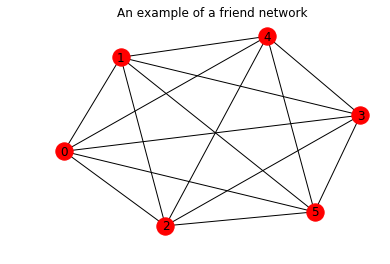

In [86]:
friend_group_count = 5
friends_per_group = 6
max_interminglings = 3

class Person(object):
    def __init__(self, id_number):
        self.id_number = id_number
        # https://homepage.stat.uiowa.edu/~mbognar/applets/normal.html
        self.gullibility = np.random.normal(loc=0.5, scale=0.1) # mean=loc,stdev=scale
        self.hostility = np.random.normal(loc=0.5, scale=0.05)
        self.activity_level = np.random.chisquare(3) / 10
        self.feed = list()
    def __str__(self):
        return str(self.id_number)

friend_groups = list()
friend_networks = list()

for group_number in range(friend_group_count):
    """
    Initialize groups of friends
    """
    
    # Create a list of friends
    lower_fence = group_number * friends_per_group
    upper_fence = lower_fence + friends_per_group
    friend_group = [Person(id_number) for id_number in range(lower_fence, upper_fence)]
    friend_groups.append(friend_group)
    
    # Create a network from the list
    friend_network = nx.Graph()
    friend_network.add_nodes_from(friend_group)
    friend_networks.append(friend_network)
    
    # Join all the members of the network together
    for friend in friend_network:
        for other_friend in friend_network:
            if other_friend is not friend:
                friend_network.add_edge(friend, other_friend)

plt.title('An example of a friend network')
nx.draw(friend_networks[0], with_labels=True)

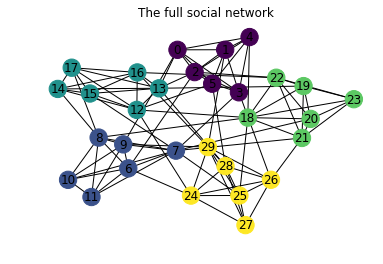

In [87]:
social_network = nx.Graph()

for friend_network in friend_networks:
    social_network.add_nodes_from(friend_network)
    social_network.add_edges_from(friend_network.edges())

for combination in itertools.combinations(friend_networks, r=2):
    fst = list(combination[0].nodes())
    snd = list(combination[1].nodes())
    for _ in range(max_interminglings):
        partner_fst = random.choice(fst)
        partner_snd = random.choice(snd)
        social_network.add_edge(partner_fst, partner_snd)

color_map = []
for index, group in enumerate(friend_groups):
    for _ in range(len(group)):
        color_map.append(index / len(friend_groups))

plt.title('The full social network')
nx.draw(social_network, with_labels=True, node_color=color_map)

In [88]:
simulation_step_count = 100

for _ in range(simulation_step_count):
    person = friend_groups[0][0]
    print(person.activity_level)
    if random.random() < person.activity_level:
        print('triggered')
        person.feed.append('bleep bloop')
print(len(person.feed))

0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.7150620459981682
triggered
0.715062